# Arima
# Autoregression --> PACF
Partial Auto Corr graph
# Moving Average --> ACF
Auto corr graph
# Integrated -->Differentiation
value

In [92]:
import numpy as np
import matplotlib.pyplot as plt
# All lib require for below calculations
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [93]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [94]:
 #Checking null value
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [95]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [96]:
# droping null value
df_airline.dropna(axis=0,inplace=True)

In [97]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [98]:
# Month is showing object
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [99]:
# converting to month in datetime
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [100]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [101]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [102]:
df_airline.set_index('Month',inplace=True)

In [103]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

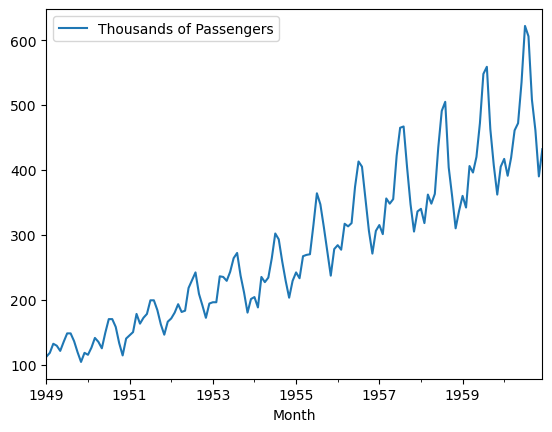

In [104]:
df_airline.plot()
#seassional data
# if it is seassional data it is not stationary data
# seassional is not stationary data

In [105]:
# dicifular test
from statsmodels.tsa.stattools import adfuller

In [106]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [107]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060423
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [108]:
## Use Techniques # default data set checking
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [110]:
adf_test(df_airline['Passengers First Difference'].dropna())
# null hypo again rej # 1st time failed

ADF Statistics: -2.8292668241699874
p- value: 0.05421329028382711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [111]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [113]:
adf_test(df_airline['Passengers Second Difference'].dropna())
# ststionary data got #2nd time got

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [114]:
### 12 months 
## Use Techniques Differencing
## Seassional with 12 months works good
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [115]:
# stationary
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [116]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#for acf=auto corr plot and pacf  value

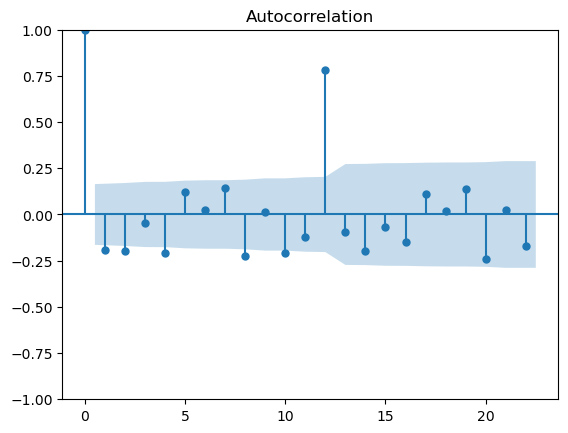

In [117]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())
# upper bound and lower bound 
# that means it has direct inpact

In [118]:
# p value = line crossing bounds
# ppt 01
# q = seassionality like 13 beause completion of 12 months curve

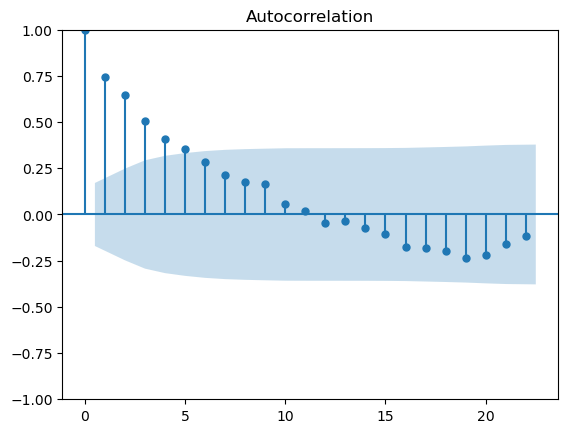

In [119]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

# q value = 5 # we are looking for q value in ACF

C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


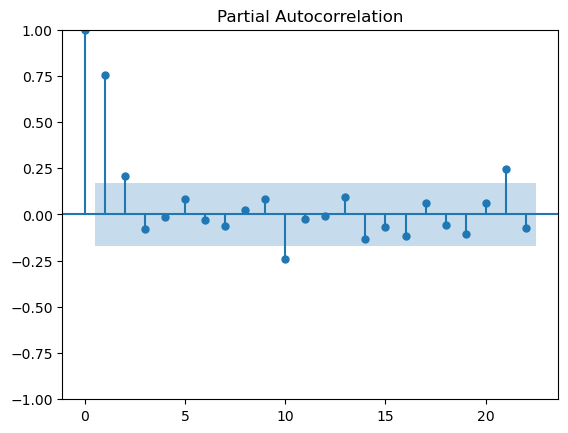

In [120]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
# pvalue = 2,10  # we are looking for p value in PACF

In [121]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [122]:
df_airline.head(13)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [123]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [124]:
## AR- Auto regression --> P value
## ACF--> q value
## d value --> difference value

In [125]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [126]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [127]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [129]:
## create a ARIMA model
import statsmodels.api as sm

In [130]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


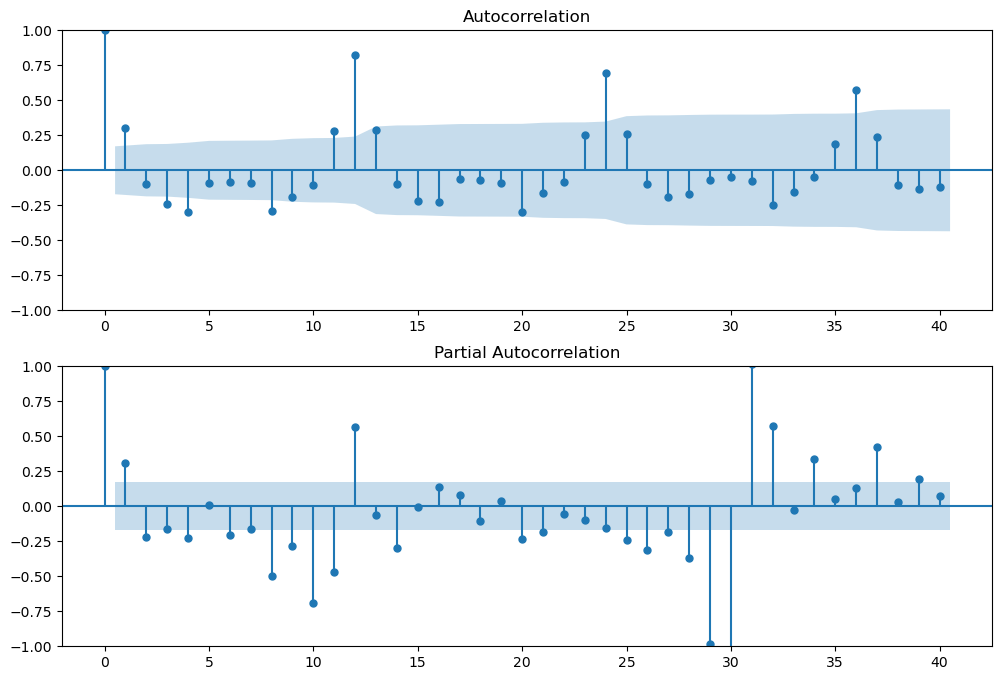

In [131]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_airline['Passengers First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_airline['Passengers First Difference'].iloc[13:],lags=40,ax=ax2)

In [132]:
# For non-seasonal data
#p=1 (AR specification), d=1 (Integration order), q=0 or 1 (MA specification/polynomial)
#AR specification, Integration order, MA specification
from statsmodels.tsa.arima_model import ARIMA

In [133]:
model = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'],order=(1, 2, 1))

C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [134]:
result = model.fit()

In [135]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(1, 2, 1)   Log Likelihood                -367.837
Date:                     Fri, 25 Aug 2023   AIC                            741.674
Time:                             11:45:08   BIC                            748.894
Sample:                         01-01-1949   HQIC                           744.572
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2214      0.131      1.687      0.092      -0.036       0.479
ma.L1         -0.9996      6.405     -0.156      0.876     -13.552      11.553
sigma2       439.4999   2819.324      0.156      0.876   -5086.273    5965.273
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.05
Prob(Q):                              0.74   Prob(JB):                         0.22
Heteroskedasticity (H):               3.56   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [137]:
pred=result.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [138]:
pred

1956-01-01    288.750769
1956-02-01    292.803074
1956-03-01    295.372055
1956-04-01    297.612565
1956-05-01    299.780338
1956-06-01    301.932004
1956-07-01    304.080103
1956-08-01    306.227412
1956-09-01    308.374546
1956-10-01    310.521641
1956-11-01    312.668728
1956-12-01    314.815813
1957-01-01    316.962898
1957-02-01    319.109982
1957-03-01    321.257066
1957-04-01    323.404151
1957-05-01    325.551235
1957-06-01    327.698320
1957-07-01    329.845404
1957-08-01    331.992488
1957-09-01    334.139573
1957-10-01    336.286657
1957-11-01    338.433742
1957-12-01    340.580826
1958-01-01    342.727910
1958-02-01    344.874995
1958-03-01    347.022079
1958-04-01    349.169163
1958-05-01    351.316248
1958-06-01    353.463332
1958-07-01    355.610417
1958-08-01    357.757501
1958-09-01    359.904585
1958-10-01    362.051670
1958-11-01    364.198754
1958-12-01    366.345838
1959-01-01    368.492923
1959-02-01    370.640007
1959-03-01    372.787092
1959-04-01    374.934176


In [139]:
residuals

Month
1956-01-01     -4.750769
1956-02-01    -15.803074
1956-03-01     21.627945
1956-04-01     15.387435
1956-05-01     18.219662
1956-06-01     72.067996
1956-07-01    108.919897
1956-08-01     98.772588
1956-09-01     46.625454
1956-10-01     -4.521641
1956-11-01    -41.668728
1956-12-01     -8.815813
1957-01-01     -1.962898
1957-02-01    -18.109982
1957-03-01     34.742934
1957-04-01     24.595849
1957-05-01     29.448765
1957-06-01     94.301680
1957-07-01    135.154596
1957-08-01    135.007512
1957-09-01     69.860427
1957-10-01     10.713343
1957-11-01    -33.433742
1957-12-01     -4.580826
1958-01-01     -2.727910
1958-02-01    -26.874995
1958-03-01     14.977921
1958-04-01     -1.169163
1958-05-01     11.683752
1958-06-01     81.536668
1958-07-01    135.389583
1958-08-01    147.242499
1958-09-01     44.095415
1958-10-01     -3.051670
1958-11-01    -54.198754
1958-12-01    -29.345838
1959-01-01     -8.492923
1959-02-01    -28.640007
1959-03-01     33.212908
1959-04-01     21.0

<Axes: ylabel='Density'>

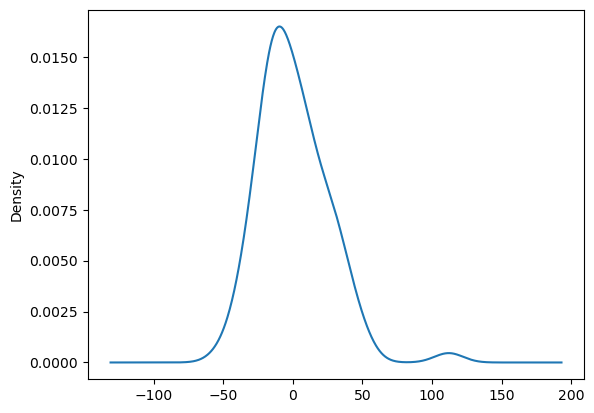

In [140]:
result.resid.plot(kind='kde')

In [141]:
test_data['Predicted_ARIMA']=pred

C:\Users\ROCKSTAR\AppData\Local\Temp\ipykernel_4792\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

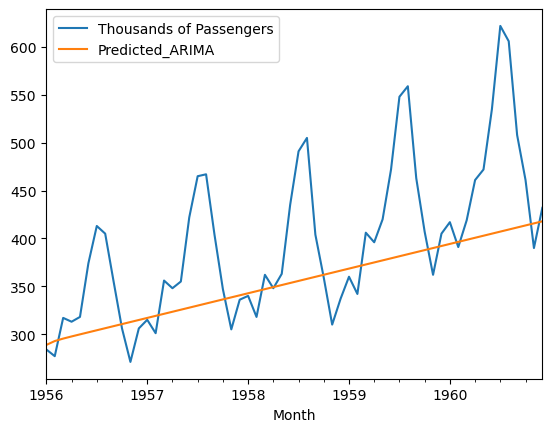

In [143]:
# Not working good with ARIMA model so now  we will go to SARIMA 
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [144]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [145]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(1,2,1),seasonal_order=(1,2,1,12))

C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROCKSTAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [146]:
model_SARIMA_fit=model_SARIMA.fit()

In [147]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -228.608
Date:                            Fri, 25 Aug 2023   AIC                            467.215
Time:                                    11:49:05   BIC                            477.518
Sample:                                01-01-1949   HQIC                           471.228
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3284      0.144     -2.281      0.023      -0.611      -0.046
ma.L1         -0.9943      1.114     -0.892      0.372      -3.178       1.190
ar.S.L12      -0.2946      0.182     -1.620      0.105      -0.651       0.062
ma.S.L12      -0.9941     25.147     -0.040      0.968     -50.281      48.292
sigma2        87.5906   2198.406      0.040      0.968   -4221.206    4396.387
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.92   Prob(JB):                         0.74
Heteroskedasticity (H):               1.28   Skew:                             0.17
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,409.287526
1960-09-01,508.0,-98.0,-82.0,45.0,411.434611
1960-10-01,461.0,-47.0,51.0,54.0,413.581695
1960-11-01,390.0,-71.0,-24.0,28.0,415.728779
1960-12-01,432.0,42.0,113.0,27.0,417.875864


In [149]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [150]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

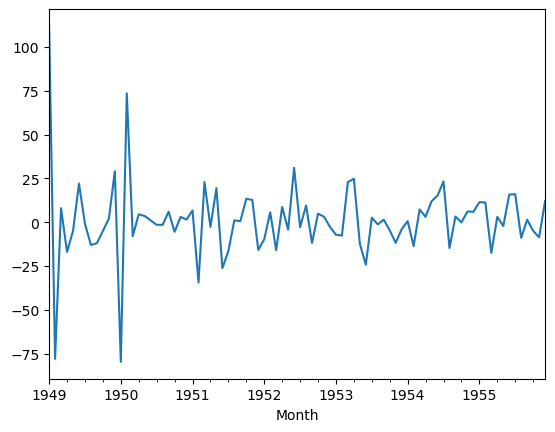

In [151]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

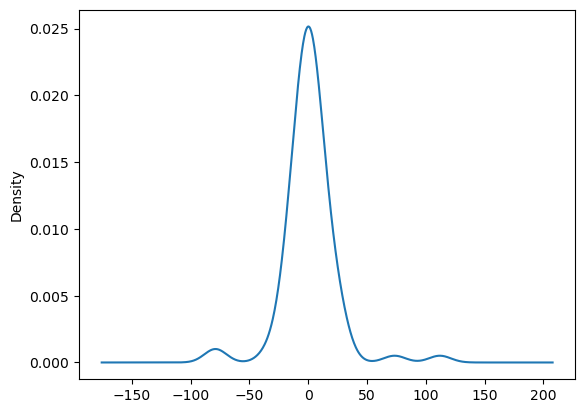

In [152]:
model_SARIMA_fit.resid.plot(kind='kde')

In [153]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\ROCKSTAR\AppData\Local\Temp\ipykernel_4792\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [154]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,288.750769,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,292.803074,NaN
1956-03-01,317.0,40.0,47.0,50.0,295.372055,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,297.612565,NaN
1956-05-01,318.0,5.0,9.0,48.0,299.780338,NaN
1956-06-01,374.0,56.0,51.0,59.0,301.932004,NaN
1956-07-01,413.0,39.0,-17.0,49.0,304.080103,422.772461
1956-08-01,405.0,-8.0,-47.0,58.0,306.227412,404.960877
1956-09-01,355.0,-50.0,-42.0,43.0,308.374546,365.306193


<Axes: xlabel='Month'>

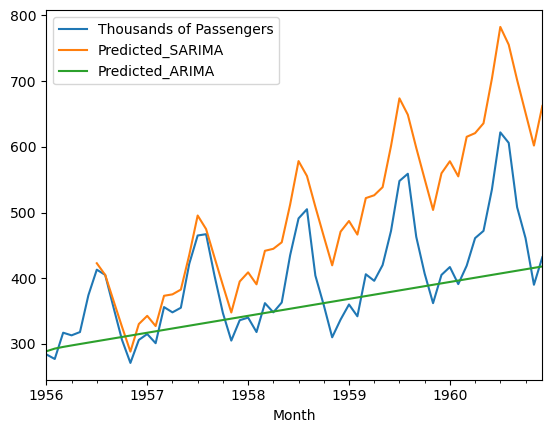

In [155]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [91]:
# IN sessional data ARIMA failed